In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
Newdf = pd.read_csv("/Users/lima22/Desktop/NBA_Salr_Bask/nbasalariespoints.csv")

In [3]:
Newdf = Newdf[["Player","Pos","FG","FGA","3P","2P","FT","FTA","ORB","DRB","AST","STL","BLK","TOV","PF","SALARY"]]

In [4]:
Newdf = Newdf.dropna()

In [5]:
Newdf["SALARY"] = Newdf["SALARY"].str.replace('$', '')

In [6]:
Newdf["SALARY"] = Newdf["SALARY"].str.replace(',', '')

In [7]:
Newdf["PTS"] = (3*Newdf["3P"] + 2*Newdf["2P"] + Newdf["FT"])

In [8]:
Newdf["PSI"] = 1.2*Newdf["PTS"] + 0.9*Newdf["FG"] - 0.3*Newdf["FGA"] - (Newdf["FTA"]-Newdf["FT"]) + 0.4*Newdf["ORB"] + 0.2*Newdf["DRB"] + Newdf["STL"] + 0.6*Newdf["AST"] + 0.2*Newdf["BLK"] - 0.4*Newdf["PF"] - 1.2*Newdf["TOV"]

In [9]:
Newdf["SIM"] = (pd.to_numeric(Newdf["SALARY"]))*0.000001

In [10]:
Newdf

,Player,Pos,FG,FGA,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,SALARY,PTS,PSI,SIM
0,Stephen Curry,PG,10.2,20.2,5.1,5.1,4.6,5.1,0.9,4.6,6.7,2.1,0.2,3.3,2.0,11370786,30.1,41.42,11.370786
1,James Harden,SG,8.7,19.7,2.9,5.8,8.8,10.2,0.8,5.3,7.5,1.7,0.6,4.6,2.8,15756438,29.1,36.50,15.756438
2,Kevin Durant,SF,9.7,19.2,2.6,7.1,6.2,6.9,0.6,7.6,5.0,1.0,1.2,3.5,1.9,20158622,28.2,37.15,20.158622
3,DeMarcus Cousins,C,9.2,20.5,1.1,8.2,7.3,10.2,2.4,9.1,3.3,1.6,1.4,3.8,3.6,15851950,27.0,32.27,15.851950
4,LeBron James,SF,9.7,18.6,1.1,8.6,4.7,6.5,1.5,6.0,6.8,1.4,0.6,3.3,1.9,22970500,25.2,34.27,22.970500
5,Damian Lillard,PG,8.2,19.7,3.1,5.2,5.5,6.2,0.6,3.4,6.8,0.9,0.4,3.2,2.2,4236287,25.2,32.27,4.236287
6,Anthony Davis,PF,9.2,18.6,0.6,8.6,5.3,7.0,2.1,8.1,1.9,1.3,2.0,2.0,2.4,7070730,24.3,32.10,7.070730
7,DeMar DeRozan,SG,7.9,17.7,0.6,7.3,7.1,8.4,0.8,3.7,4.0,1.0,0.3,2.2,2.1,10050000,23.5,29.74,10.050000
8,Russell Westbrook,PG,8.2,18.1,1.3,6.9,5.8,7.2,1.8,6.0,10.4,2.0,0.3,4.3,2.5,16744218,23.5,32.81,16.744218
9,Paul George,SF,7.5,17.9,2.6,4.9,5.6,6.5,1.0,6.0,4.1,1.9,0.4,3.3,2.8,17120106,23.2,29.28,17.120106


In [11]:
Newdf.sort_values(by=['PSI'])

,Player,Pos,FG,FGA,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,SALARY,PTS,PSI,SIM
472,Bruno Caboclo,SF,0.2,2.0,0.2,0.0,0.0,0.0,0.2,0.2,0.2,0.3,0.2,0.7,0.3,1524000,0.6,-0.08,1.524000
473,Sam Dekker,SF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,1646400,0.0,0.36,1.646400
468,Aaron Harrison,SG,0.2,0.9,0.1,0.1,0.2,0.6,0.2,0.5,0.1,0.3,0.0,0.2,0.5,525093,0.7,0.45,0.525093
460,Keith Appling,PG,0.4,1.6,0.0,0.4,0.4,0.4,0.0,0.2,0.2,0.2,0.0,0.6,1.0,61776,1.2,0.56,0.061776
462,Pat Connaughton,SG,0.4,1.4,0.1,0.2,0.1,0.1,0.3,0.6,0.3,0.1,0.0,0.3,0.2,625093,0.8,0.98,0.625093
461,Luis Montero,SG,0.4,1.6,0.1,0.3,0.3,0.3,0.0,0.3,0.1,0.0,0.0,0.3,0.1,525093,1.2,1.04,0.525093
463,Bryce Cotton,PG,0.5,1.3,0.0,0.5,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.6,0.3,700902,1.0,1.06,0.700902
466,James Young,SG,0.4,1.2,0.2,0.2,0.0,0.1,0.1,0.8,0.3,0.2,0.0,0.2,0.6,1749840,1.0,1.20,1.749840
467,Joel Anthony,C,0.3,0.5,0.0,0.3,0.3,0.4,0.4,0.7,0.1,0.1,0.6,0.1,0.8,2500000,0.9,1.24,2.500000
469,Sasha Kaun,C,0.4,0.7,0.0,0.4,0.2,0.4,0.5,0.6,0.1,0.2,0.2,0.3,0.4,1276000,1.0,1.25,1.276000


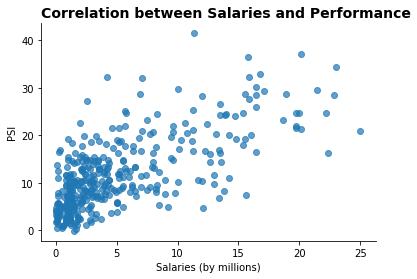

In [12]:
fig, ax = plt.subplots() 

ax.scatter(Newdf["SIM"], Newdf["PSI"], 
            alpha= 0.70) 

ax.set_title('Correlation between Salaries and Performance', loc='left', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Salaries (by millions)")
ax.set_ylabel("PSI")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

plt.show()

TypeError: unhashable type: 'slice'

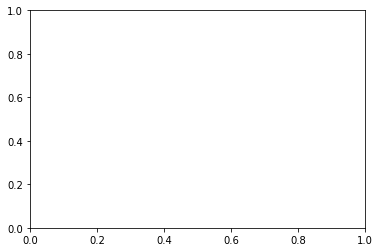

In [30]:
fig, ax = plt.subplots() 


ax.scatter(Newdf["SIM"], Newdf["PSI"], c=Newdf[:,2], alpha= 0.70) 

cbar = plt.colorbar()

ax.set_title('Correlation between Salaries and Performance', loc='left', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Salaries (by millions)")
ax.set_ylabel("PSI")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

plt.show()

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = Pos.

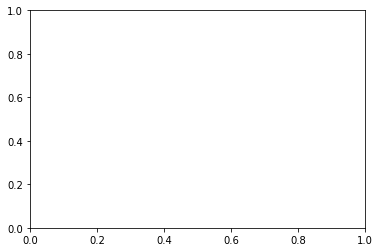

In [18]:
# ax2 = Newdf.plot.scatter(x='SIM',y='PSI',c='Pos',colormap = 'viridis')